# **Actividad III Correlación y Regresión Lineal**
Curso: Estadistica y Probabilidades para la Ciencia de Datos

Profesor: Carlos Ramírez

![Logo AIEP](https://upload.wikimedia.org/wikipedia/commons/1/1c/Logo_aiep.jpg)


# Integrantes:
1) Marjorie González





**1. importar los datos del Imacec y el PIB desde un archivo Excel a Python.**




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

**para importar el dataset del imacec use:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
imacec = pd.read_excel('/content/drive/MyDrive/Imacec-mensual-1996-2023.xlsx', skiprows=2, usecols='A,B')
imacec.head()

Mounted at /content/drive


,Periodo,Imacec
0,1996-01-01,42.487431
1,1996-02-01,41.164549
2,1996-03-01,44.717817
3,1996-04-01,43.672806
4,1996-05-01,43.487325


**y para importar el dataset del pib use:**

In [ ]:
pib = pd.read_excel("/content/drive/MyDrive/PIB-anual-1996-2022.xlsx", skiprows=2, usecols="A,B")
pib.head()

,Periodo,PIB
0,1996-01-01,32393.861842
1,1997-01-01,35946.985040
2,1998-01-01,37741.618688
3,1999-01-01,38461.785405
4,2000-01-01,42215.029917


**2. ¿Qué tipo de variable es el Imacec? ¿Es continua o discreta? ¿Es cuantitativa o cualitativa?**

       R// Es una variable Cuantitativa Continua

**3.visualizar la serie temporal del Imacec :**

**¿Qué se puede observar al graficar la serie de datos del IMACEC? ¿Hay alguna tendencia o patrón que se pueda identificar? ¿Se puede observar algún comportamiento aleatorio?**

R//  Se puede observar que el IMACEC a ido creciendo a lo largo del tiempo, sin embargo tiene un ciclo estacionario, en el cual luego de una fuerte baja aumenta considerablemente pero sin alcanzar la caida,  luego tiene otra caída pero se recupera superando la caída inicial. Aunque a eso del 2021 se puede observar una fuerte caída y una fuerte alza en comparación a los años anteriores.


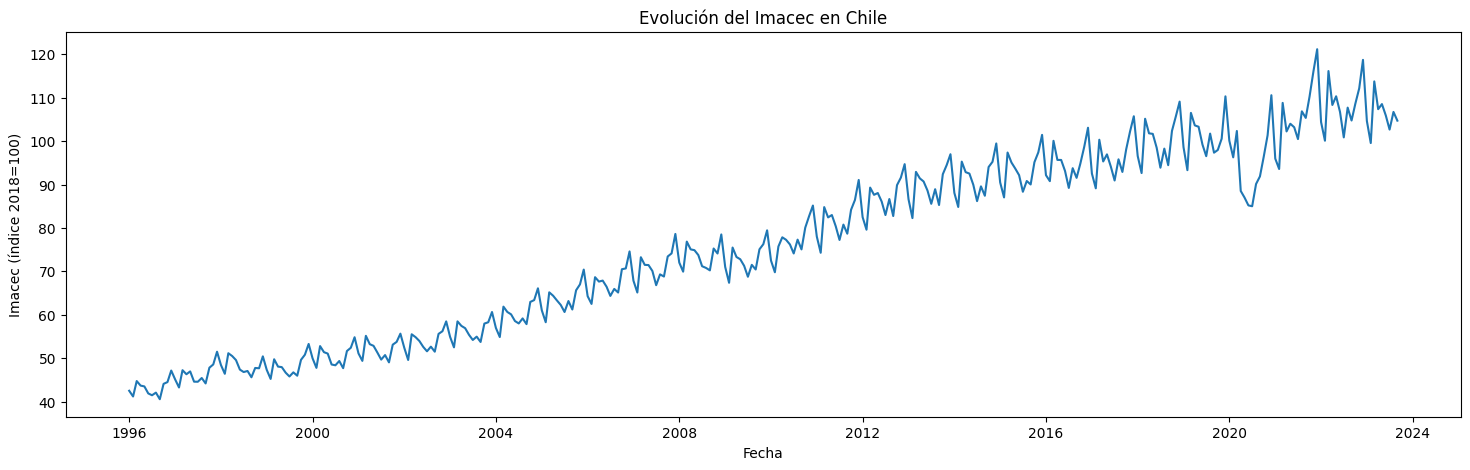

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(imacec["Periodo"], imacec["Imacec"])
plt.title("Evolución del Imacec en Chile")
plt.xlabel("Fecha")
plt.ylabel("Imacec (índice 2018=100)")
plt.show()

**4. visualizar la serie temporal del PIB :**



¿qué se puede observar?
¿Hay alguna particularidad en la serie?
¿Se puede identificar algún patrón o comportamiento aleatorio?
¿Es más estable que el IMACEC?
¿Influye la frecuencia de los datos en la estabilidad?
¿Cómo se podría solucionar la inestabilidad del IMACEC?

R// Al observar el gráfico puede notar que existe ninguna baja, sino que está en constante crecimiento, aunque tuvo un fuerte aumento durante el 2020. En comparación al Imacec es mucho más estable, lo cual se debe a que los datos son tomados una vez al año en la misma fecha.
Para poder solucionar el problema de la inestabilidad del Imacec sería recomendable sacar el promedio del año y determinar un indicador anual.


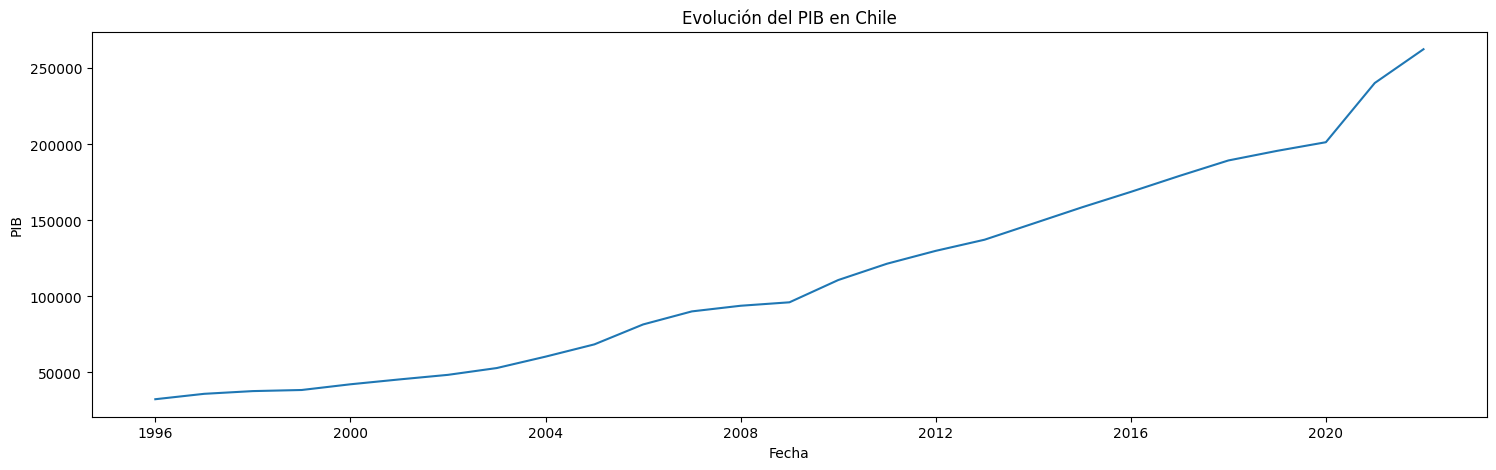

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(pib["Periodo"], pib["PIB"])
plt.title("Evolución del PIB en Chile")
plt.xlabel("Fecha")
plt.ylabel("PIB")
plt.show()

**5. Comparación las series de tiempo del PIB y del IMACEC.**



<ipython-input-6-38887c6ee23a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  imacec_anual = imacec_anual.groupby("Año").mean().reset_index()


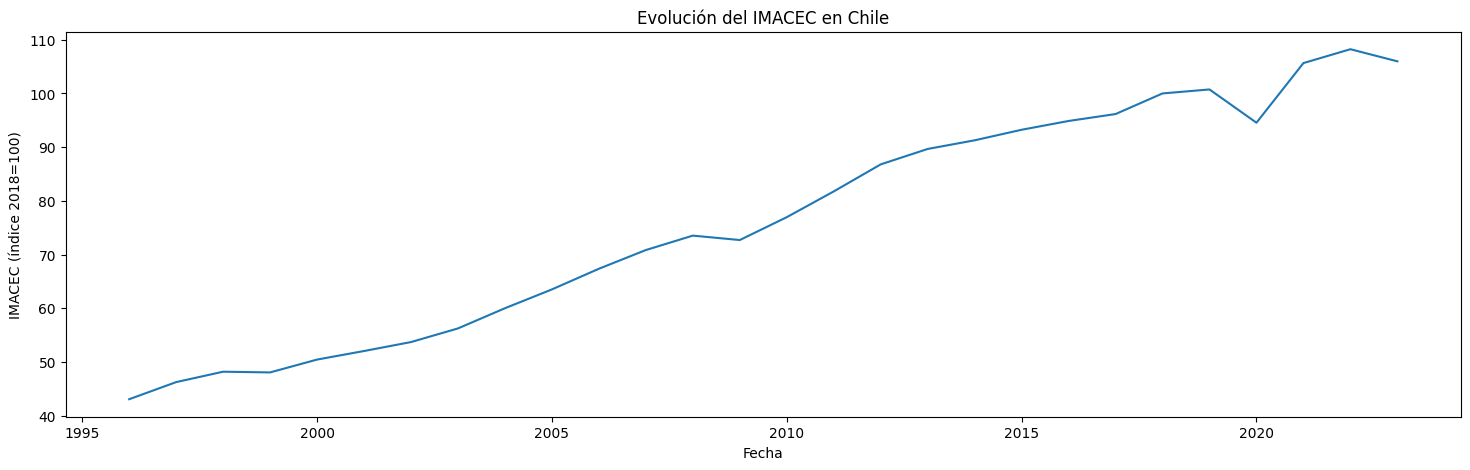

In [ ]:
imacec_anual = imacec.copy()
imacec_anual["Año"] = imacec_anual["Periodo"].dt.year
imacec_anual = imacec_anual.groupby("Año").mean().reset_index()
plt.figure(figsize=(18,5))
plt.plot(imacec_anual["Año"], imacec_anual["Imacec"])
plt.title("Evolución del IMACEC en Chile")
plt.xlabel("Fecha")
plt.ylabel("IMACEC (índice 2018=100)")
plt.show()

**Después de observar el gráfico generado, responde a las siguientes preguntas:**

¿Notas alguna tendencia en la serie de tiempo del IMACEC?

R// Aproximadamente cada 10 años suele tener caídas de las cuales luego
se recupera, esto se puede ver en los años cercanos al 2000, 2010 y 2020.

¿Hay algún periodo con una baja o alza significativa? Si es así, ¿a qué crees que se deba?

R// Tuvo una baja significativa en el periodo 2019-2020, lo que se debe a los efectos de la pandemia, muchas de las restricciones provocaron una baja en las actividades económicas que se realizaban.

*Comparando este gráfico con el primer gráfico del IMACEC, ¿notas alguna diferencia en la estabilidad de la serie de tiempo? Si es así, ¿por qué crees que ocurre esto?

R// En comparación al primer gráfico, este es mucho más estable, esto se debe a que al medir periodos de tiempos muy pequeños comolo es en el caso del Imacec que se ve mensualmente, tiene muchos cambios a lo largo del año según las diferentes actividades económicas que se realizan, en cambio al poderlo evaluar en un periodo de tiempo más grande como lo es en el segundo gráfico
se puede ver un promedio o un resumen más estable de los datos.


**Renombrar la columna "Periodo" a "Año" en el DataFrame del PIB. Luego, reemplazamos la fecha de la columna "Año" por el año de la columna "Año".**




In [ ]:
pib.rename(columns={"Periodo": "Año"}, inplace=True)
pib["Año"] = pib["Año"].dt.year
pib.head()

,Año,PIB
0,1996,32393.861842
1,1997,35946.985040
2,1998,37741.618688
3,1999,38461.785405
4,2000,42215.029917


**Unir conjunto de datos para poder compararlos ( eliminar el año 2023 del conjunto de datos del IMACEC). Fusionar los dos DataFrames.**

In [ ]:

imacec_anual = imacec_anual[imacec_anual["Año"] != '2023']

fusion = pd.merge(pib, imacec_anual, on="Año")
fusion.head(30)

,Año,PIB,Imacec
0,1996,32393.861842,43.094231
1,1997,35946.985040,46.279644
2,1998,37741.618688,48.214543
3,1999,38461.785405,48.082613
4,2000,42215.029917,50.473099
5,2001,45409.054801,52.065038
6,2002,48428.963170,53.732576
7,2003,52897.338900,56.270498
8,2004,60391.763165,60.026134
9,2005,68467.939844,63.529887


**Crear y visualizar la matriz de correlación con el siguiente código:**

Después de ejecutar este código, por favor, observa los siguientes puntos:

- Observa los valores de la matriz de correlación. ¿Qué puedes deducir de ella?

- Observa el gráfico de la matriz de correlación. ¿Qué puedes inferir de él?

- ¿Puedes identificar alguna correlación fuerte entre las variables?

- ¿Qué conclusiones puedes sacar de esta matriz de correlación?

R// Todas las variables poseen una alta correlación, sin embargo, el Imacec con el PIB tienen una mayor correlación el año que entre ellas mismas, siendo la más predecible la de Imacec-Año con un coeficiente de correlación de 0,99. Vale
considerar que la correlación entre el PIB y el Imacec es bastante fuerte con una correlación de 0,97 , lo cual se debe a que ambas van en constante crecimiento, sin embargo, lo que hace que sea una correlación menor a las demás es que el imacec en el año 2020 presenta una caída considerable y el PIB mantuvo su crecimiento.


             Año       PIB    Imacec
Año     1.000000  0.977113  0.991299
PIB     0.977113  1.000000  0.971589
Imacec  0.991299  0.971589  1.000000


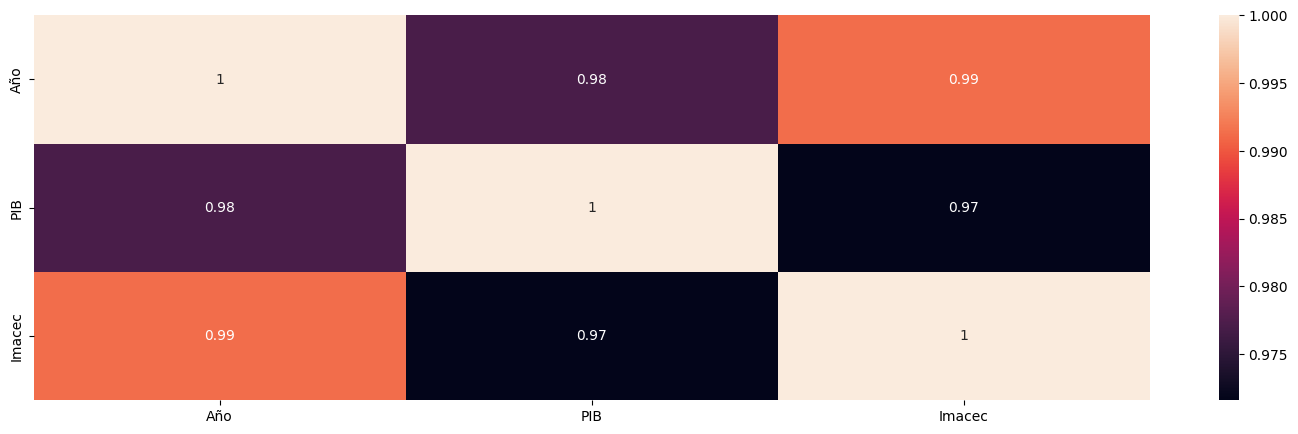

In [ ]:
plt.figure(figsize=(18,5))
corr_matrix = fusion.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)
plt.show()

**Realizar una regresión lineal para el PIB y el IMACEC en base al año.**

- ¿Cuáles son las ecuaciones de regresión lineal para el PIB y el IMACEC?

R//
     PIB: Y=22,782X-793408
     IMACEC: Y= 3E+06x+4E+07
(Datos obtenidos en excel)

- ¿Qué puedes deducir de los resultados?

R// Al observar las ecuaciones se puede notar a simple vista que el PIB posee un menor ruido que el IMACEC por lo que es mucho más fácil de predecir

Observa los gráficos de las regresiones lineales.

¿Qué puedes inferir de los gráficos?

R//A pesar de que los datos son relativamente estables y se podría estimar los futuros resultados, no se pueden predecir con exactitud, sobre todo en los últimos años, ya que en el caso del PIB tuvo dos fuertes alzas en los años 2021 y 2022, en el caso del IMACEC tuvo una fuerte caída en el año 2020.

¿Las rectas de regresión "emulan" de manera apropiada a los datos?

R// Las rectas de regresión llegan a emular de forma asertiva los datos ya que en la mayoría de los casos se acerca bastante a los valores obtenidos en cada año.

¿Puedes identificar alguna tendencia en los datos?

R//Los datos suelen tener una tendencia al alza, en el caso del PIB no presenta ninguna baja, pero en el caso del Imagen, presenta 3 bajas aproximadamente cada 10 años, en el 1999 con una pequeña baja de 0.13193,en el año 2009 con una baja de 0.822182 y en el 2020 con una gran baja de 6.190914 en comparación a su año anterior, sin embargo al siguiente año suele recuperarse de esa caída.

¿Qué conclusiones puedes sacar de estas regresiones lineales?

R// Al observar ambas regresiones se puede observar que los datos son bastantes estables y no presentan mayor variación entre un año y otro a pesar que los datos tienden al alza. Se podría estimar un resultado bastante cercano a la realidad,sin embargo no los llega a predecir con exactitud.

In [ ]:
modelo_imacec = sm.OLS.from_formula("Imacec ~ Año", data=fusion)
resultados_imacec = modelo_imacec.fit()
modelo_pib = sm.OLS.from_formula("PIB ~ Año", data=fusion)
resultados_pib = modelo_pib.fit()

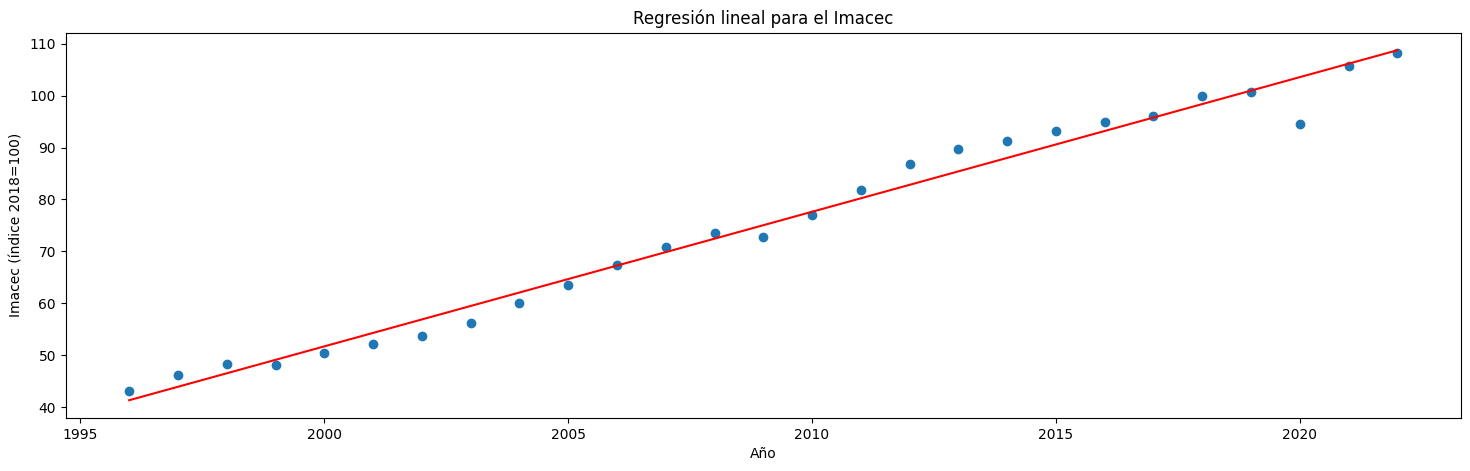

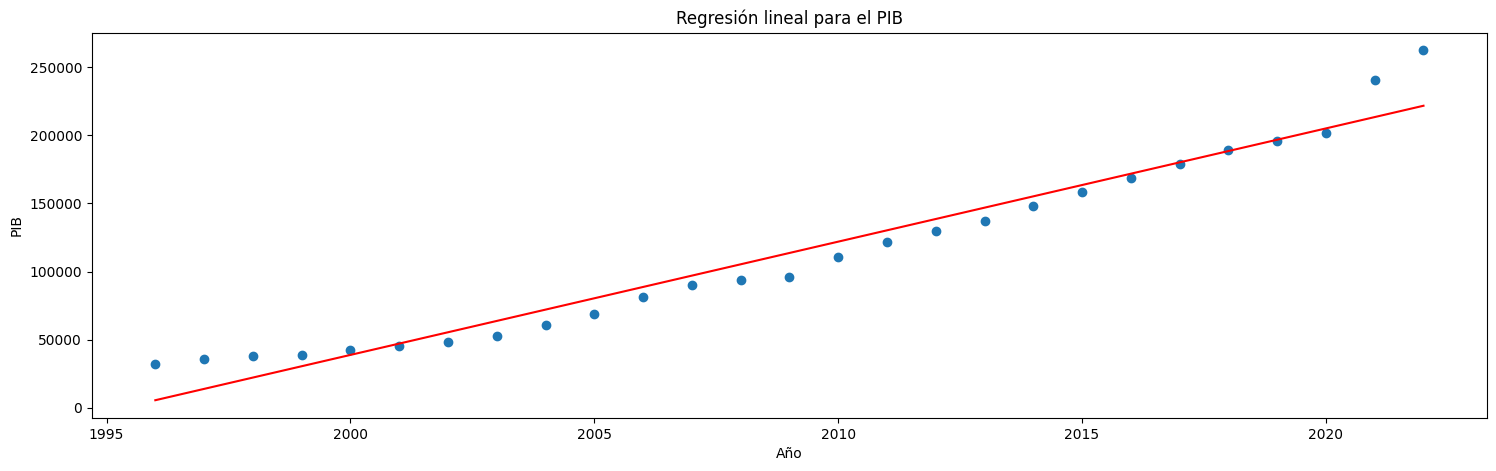

In [ ]:
plt.figure(figsize=(18,5))
plt.scatter(fusion["Año"], fusion["Imacec"])
plt.plot(fusion["Año"], resultados_imacec.predict(), color="red")
plt.title("Regresión lineal para el Imacec")
plt.xlabel("Año")
plt.ylabel("Imacec (índice 2018=100)")
plt.show()

plt.figure(figsize=(18,5))
plt.scatter(fusion["Año"], fusion["PIB"])
plt.plot(fusion["Año"], resultados_pib.predict(), color="red")
plt.title("Regresión lineal para el PIB")
plt.xlabel("Año")
plt.ylabel("PIB")
plt.show()

**haga una predicción para el año 2023 del IMACEC y del PIB con el sigueinte codigo:**

- ¿Cómo evaluarías la confiabilidad de estas predicciones? utilice el criterio del $r^2$

R// La predicción presenta una alta confiabilidad en los datos, ya que según el modelo implementado los $r^2$ presentan un cercania al 1, teniendo el PIB un r2=0,9548 y el IMACEC con un $r^2$ =0,9827, lo que indica una mayor estabilidad en el tiempo. El PIB=230122.053093 tiene una prediccion bastante similar a la de las tablas observadas en summary sin embargo se aleja por 3561.362407000124 , el IMACEC=111.353246 que parece ser una predicción más confiable , ya que solo presenta una diferencia de -0.03544599999928266 en relaciòn a la tabla summary.

In [ ]:
print(resultados_imacec.summary())

                            OLS Regression Results                            
Dep. Variable:                 Imacec   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1418.
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           1.54e-23
Time:                        20:48:31   Log-Likelihood:                -64.952
No. Observations:                  27   AIC:                             133.9
Df Residuals:                      25   BIC:                             136.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5135.3327    138.376    -37.111      0.0

In [ ]:
print(resultados_pib.summary())

                            OLS Regression Results                            
Dep. Variable:                    PIB   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     527.5
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           2.53e-18
Time:                        20:48:31   Log-Likelihood:                -296.29
No. Observations:                  27   AIC:                             596.6
Df Residuals:                      25   BIC:                             599.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.66e+07   7.28e+05    -22.811      0.0

In [ ]:
intercept = -5135.3327
año = 2.5935
imacec_2023= intercept + año *2023
imacec_2023

111.31780000000072

In [ ]:
intercept = -1.66e+07
año = 8321.1485
pib_2023= intercept + año *2023
pib_2023

233683.41550000012

In [ ]:
prediccion_imacec_2023 = resultados_imacec.predict({"Año": 2023})

prediccion_imacec_2023.head()

0    111.353246
dtype: float64

In [ ]:
prediccion_pib_2023 = resultados_pib.predict({"Año": 2023})
prediccion_pib_2023.head()

0    230122.053093
dtype: float64

In [ ]:
tabla = 233683.41550000012
prediccion = 230122.053093
diferencia_pib= tabla - prediccion
diferencia_pib

3561.362407000124

In [ ]:
tablai = 111.31780000000072
prediccioni = 111.353246
diferencia_imacec= tablai - prediccioni
diferencia_imacec

-0.03544599999928266